In [2]:
import sympy as sp

In [3]:
t = sp.symbols('t', positive=True)
s = sp.symbols('s')
a = sp.symbols('a', real=True, positive=True)

In [4]:
f = sp.exp(-a * t)
f

exp(-a*t)

In [6]:
F = sp.laplace_transform(f, t, s, noconds = True)
F

1/(a + s)

In [7]:
G = 1 / (s ** 2 + 1)
G

1/(s**2 + 1)

In [8]:
g = sp.inverse_laplace_transform(G, s, t)
g

sin(t)

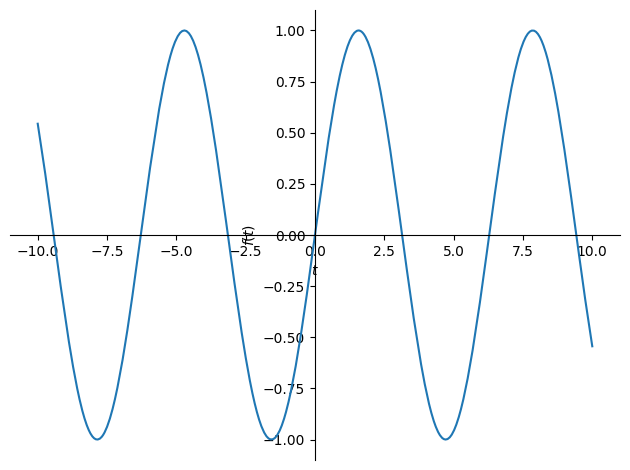

In [9]:
sp.plot(g)

In [1]:
import numpy as np

In [14]:
def gauss_laplace_inverse(f, T, N):
    """
    Calcula la transformada inversa de Laplace de una función F(s) utilizando el método de cuadratura de Gauss.

    Parámetros:
    F (función): la función de Laplace F(s).
    T (float): el valor de t en el que se quiere evaluar la función inversa de Laplace.
    N (int): el número de puntos de la cuadratura de Gauss a utilizar.

    Retorna:
    El valor de la función inversa de Laplace evaluada en t.
    """

    # Definimos la función a integrar
    def integrand(u):
        return f(u) * np.exp(u*T)

    # Calculamos los puntos y pesos de la cuadratura de Gauss
    x, w = np.polynomial.legendre.leggauss(N)

    # Convertimos los puntos de la cuadratura de Gauss a nuestro intervalo de integración
    a = -1
    b = 1
    t = 0.5*(b-a)*x + 0.5*(b+a)

    # Evaluamos la función en los puntos de la cuadratura de Gauss y multiplicamos por los pesos correspondientes
    integrand_values = integrand(t)
    integral_value = np.dot(w, integrand_values)

    # Dividimos por pi para obtener la función inversa de Laplace
    result = integral_value / np.pi

    return result

In [15]:
def f(s):
    return 1 / np.sqrt(s**2 + 1)

result = gauss_laplace_inverse(f, 8, 12)

In [16]:
result

89.3093534275522

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def inverse_laplace(F, x0, y0, h, N):
   
    # Definición del arreglo de puntos
    x = np.zeros(N+1)
    y = np.zeros(N+1, dtype=np.complex128)
    x[0] = x0
    y[0] = y0
    
    # Cálculo de los puntos usando el método de Euler
    for n in range(N):
        y[n+1] = y[n] + h * (F(x[n]) + F(x[n+1])) / 2
        print(F(x[n]) + F(x[n+1]))
        x[n+1] = x[n] + h
    
    # Imprimir los puntos
    print("Puntos calculados:")
    for n in range(N+1):
        print(f"x_{n} = {x[n]:.4f}   y_{n} = {y[n].real:.4f} + {y[n].imag:.4f}j")
    
    # Graficar la función resultante
    plt.plot(x, y.real)
    plt.plot(x, y.imag)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Parte real', 'Parte imaginaria'])
    plt.show()

1.0
0.5192307692307693
0.504950495049505
0.5022123893805309
0.5012468827930174
0.5007987220447284
0.5005549389567148
0.5004078303425775
0.5003123048094941
0.5002467917077986
0.5001999200319872
0.5001652346331791
0.5001388503193558
0.5001183151916706
0.5001020199959192
0.5000888730892286
0.5000781127948758
0.5000691945751453
0.5000617207752129
0.5000553955240417
Puntos calculados:
x_0 = 0.0000   y_0 = 0.0000 + 0.0000j
x_1 = 10.0000   y_1 = 5.0000 + 0.0000j
x_2 = 20.0000   y_2 = 7.5962 + 0.0000j
x_3 = 30.0000   y_3 = 10.1209 + 0.0000j
x_4 = 40.0000   y_4 = 12.6320 + 0.0000j
x_5 = 50.0000   y_5 = 15.1382 + 0.0000j
x_6 = 60.0000   y_6 = 17.6422 + 0.0000j
x_7 = 70.0000   y_7 = 20.1450 + 0.0000j
x_8 = 80.0000   y_8 = 22.6470 + 0.0000j
x_9 = 90.0000   y_9 = 25.1486 + 0.0000j
x_10 = 100.0000   y_10 = 27.6498 + 0.0000j
x_11 = 110.0000   y_11 = 30.1508 + 0.0000j
x_12 = 120.0000   y_12 = 32.6516 + 0.0000j
x_13 = 130.0000   y_13 = 35.1523 + 0.0000j
x_14 = 140.0000   y_14 = 37.6529 + 0.0000j
x_15 =

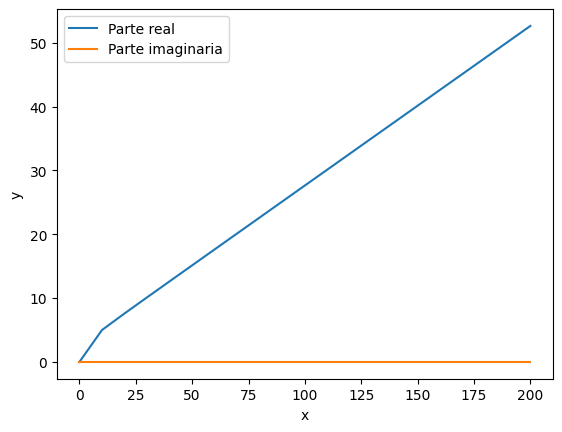

In [17]:
F_str = '2/(s**2 + 4)'
F = lambda s: eval(F_str)  # Definir la función de la transformada de Laplace

# Ingreso de los parámetros
x0 = 0
y0 = 0
h = 10
N = 20

inverse_laplace(F, x0, y0, h, N)